## BIGMARK SALE PREDICTION

#####  *Sales prediction enables businesses to plan and make informed decisions about future operations, marketing, and resource allocation. Accurate sales forecasting can help businesses anticipate future demand, identify potential problems or opportunities, and adjust their strategies accordingly*
*Today, my project to predict sale of Bigmark supermarket for better understanding the market trend*

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

First, load the data sale

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Next, split the dataset into training, and testing parts

In [11]:
x_train = train.copy()
x_test = test.copy()

In [12]:
y_train = x_train.pop("Item_Outlet_Sales")
y_test = x_test.pop("Item_Outlet_Sales")

In [13]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

Also, normalize the dataset for better quality model

In [15]:
num_col = list(x_train.columns)

In [16]:
for i in num_col:
    scale = StandardScaler().fit(x_train_stand[[i]])
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

Create the model LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train_stand, y_train)

LinearRegression()

Then, we have the coefficience and intercept of the model

In [30]:
print("Slope of model are :",model.coef_)
print("Intercept of model is: ", model.intercept_ )

Slope of model are : [-1.60283015e+01  1.26407946e+01  1.01189773e+03  4.23670379e+02
  2.77797524e+14  6.93937374e+14  6.70431071e+14  1.56669862e+14
  1.52048500e+14  3.31855231e+14  2.01368594e+14  1.10866581e+14
  3.30417415e+14  3.40303637e+14  3.80904915e+14  4.32028619e+14
  1.72664478e+14  2.96325500e+14  3.79735558e+14  2.67893887e+14
  1.69500173e+14  1.24935632e+14  4.29206474e+14  2.84328335e+14
  1.81800033e+14  5.41570474e+02  2.68305177e+02  5.35637211e+01
  7.51091876e+16  7.75921931e+16  8.05736913e+16 -1.07490674e+16
 -1.53656795e+16 -1.00254677e+16 -9.90143653e+15]
Intercept of model is:  2233.469005670569


In [25]:
prediction = model.predict(x_test_stand)

In [35]:
print("Mean squared error of model is:",mean_squared_error(y_test, prediction))
print("R score of model is: ",r2_score(y_test, prediction))
print("Mean abosulte error of model is: ",mean_absolute_error(y_test, prediction))

Mean squared error of model is: 1057441.8503649666
R score of model is:  0.542385192131537
Mean abosulte error of model is:  781.5211390346788


Plot the line to see how the model perform prediction in compare with real value <br> 
*As you can see, the scatter point stay around the true value (straight red line)*

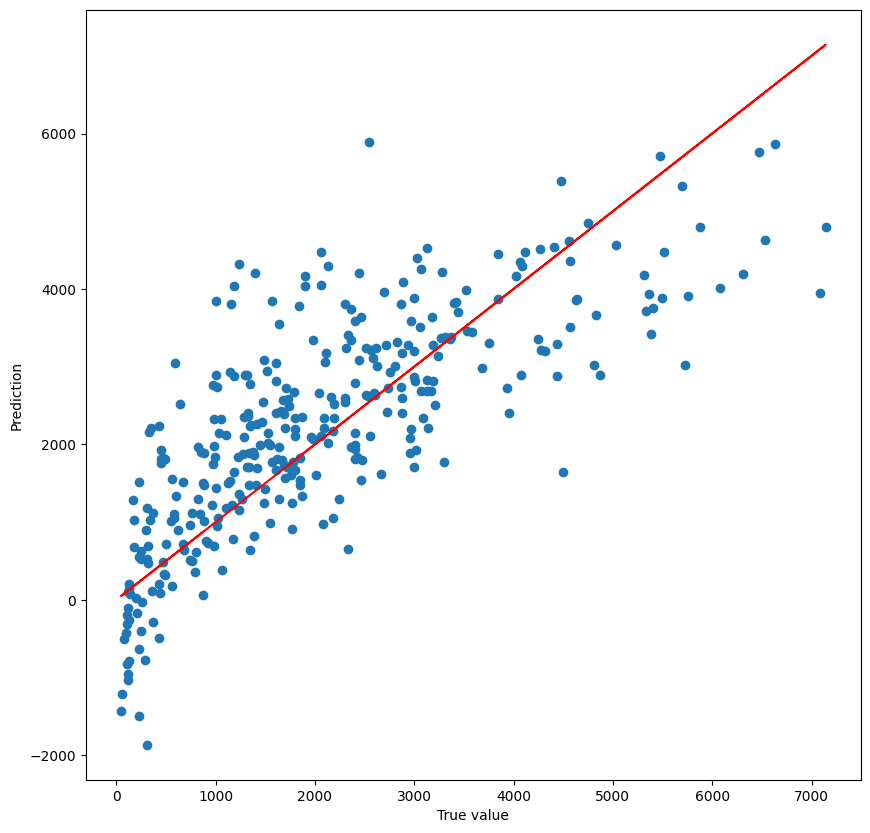

In [33]:
fig = plt.figure(figsize=(10,10))

plt.scatter(y_test, prediction)
plt.plot(y_test,y_test, color="red")

plt.xlabel("True value")
plt.ylabel("Prediction")

plt.show()